In [1]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

/home/mach1ne/anaconda3/envs/run_models_gpytorch/lib/python3.9/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
dataset_name = 'tourism'
dataset = tsag.preprocessing.PreprocessDatasets(dataset=dataset_name,
                                               input_dir='../')
groups = dataset.apply_preprocess()

In [3]:
data = tsag.transformations.CreateTransformedVersions(dataset_name,
                                                      input_dir='../')
data.parameters = {"jitter": 1.5,
                   "scaling": 0.3,
                   "magnitude_warp": 0.3,
                   "time_warp": 0.005}

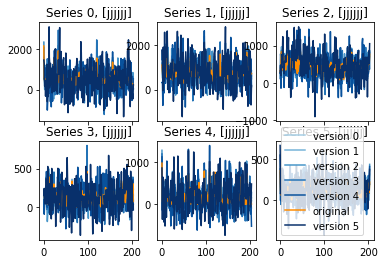

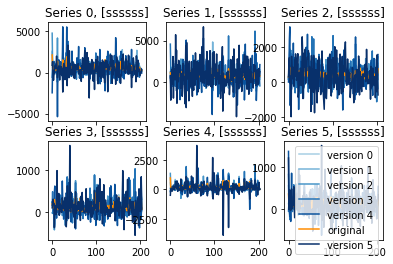

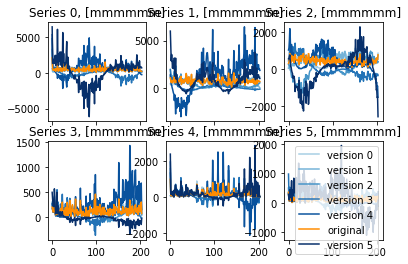

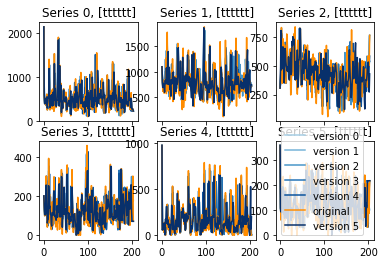

In [4]:
data.create_new_version_single_transf()